In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_path = "heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)

# For showing all columns
pd.set_option('display.max_columns', None)

df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


## Visualization

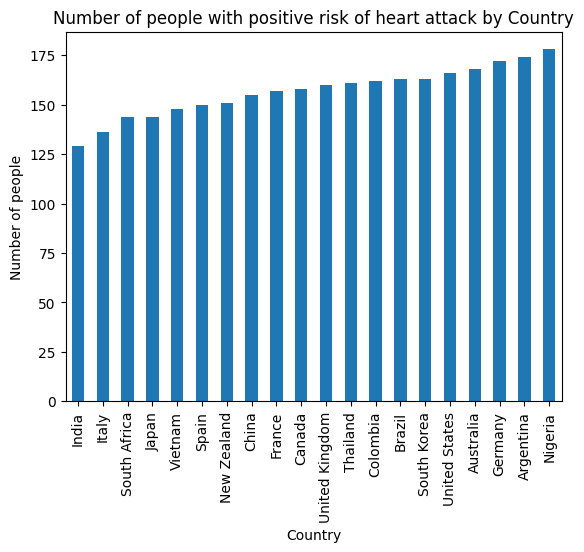

In [3]:
# Assuming you have a dataframe called 'data' with a 'country' column and a 'target_panel' column
ha_vs_country = df.groupby('Country')['Heart Attack Risk'].sum().sort_values()
ha_vs_country.plot(kind='bar')
plt.title('Number of people with positive risk of heart attack by Country')
plt.xlabel('Country')
plt.ylabel('Number of people')
plt.show()

Top fifth countries are

Negeria

Argentina

Germany

Australia

United States

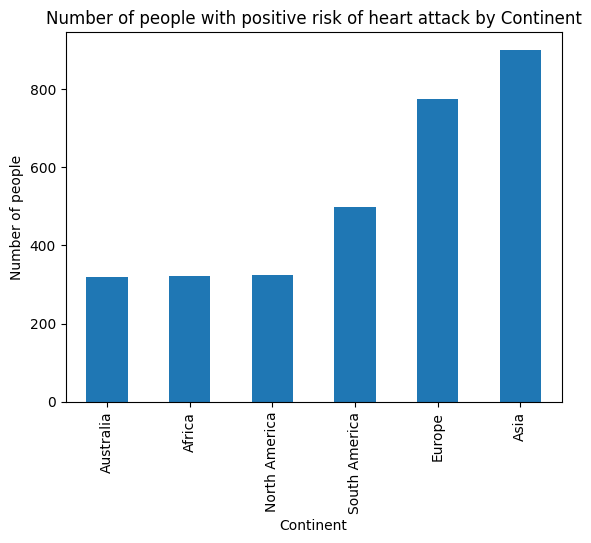

In [58]:
# Assuming you have a dataframe called 'data' with a 'country' column and a 'target_panel' column
ha_vs_country = df.groupby('Continent')['Heart Attack Risk'].sum().sort_values()
ha_vs_country.plot(kind='bar')
plt.title('Number of people with positive risk of heart attack by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of people')
plt.show()

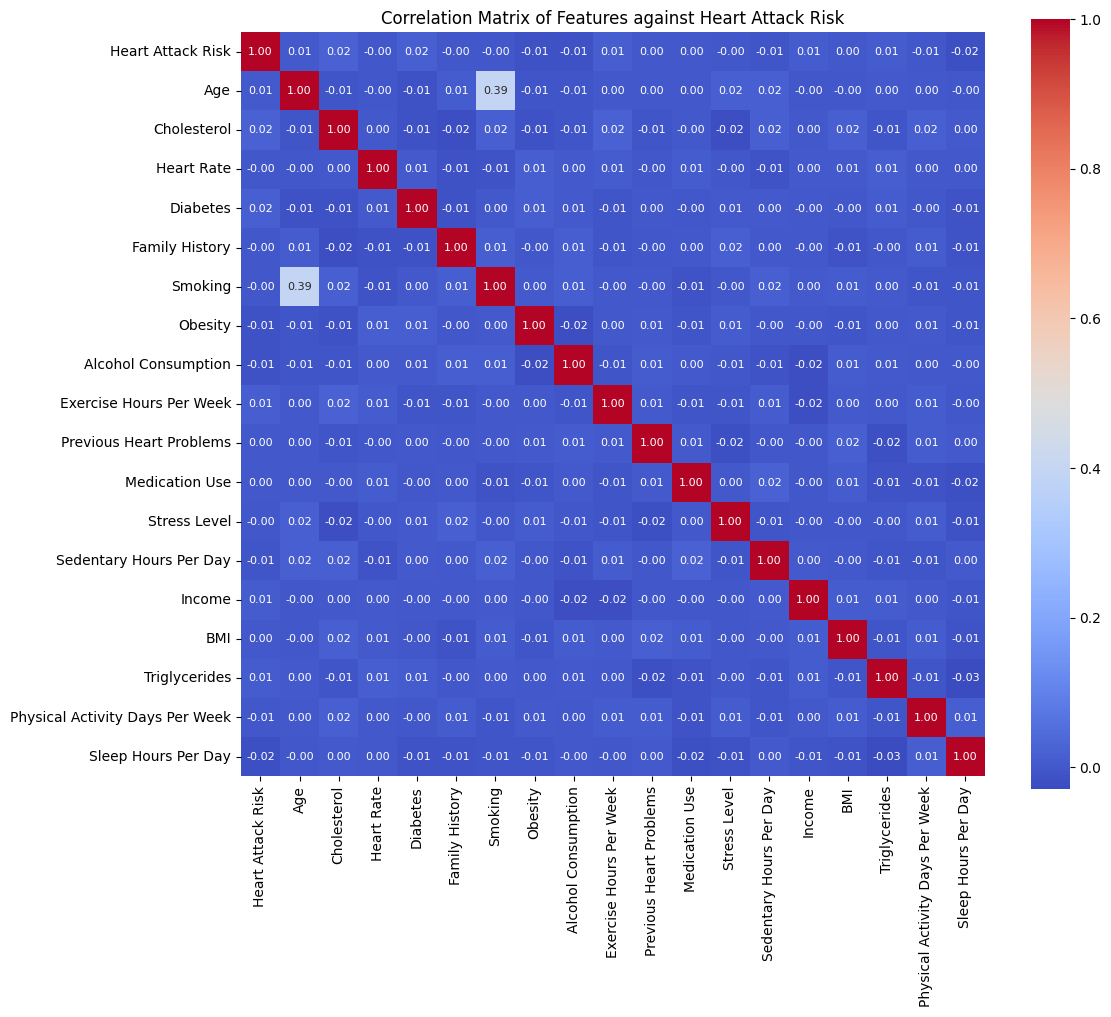

In [4]:
# Move heart attack column to first column
cols = df.columns.tolist()
cols = ['Heart Attack Risk'] + [col for col in cols if col != 'Heart Attack Risk']
temp_encoded_df = df[cols]

# calculate the correlations
correlation_matrix = temp_encoded_df.corr(numeric_only=True)
correlation_target = correlation_matrix['Heart Attack Risk'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt='.2f', square = True)
plt.title('Correlation Matrix of Features against Heart Attack Risk')
plt.show()

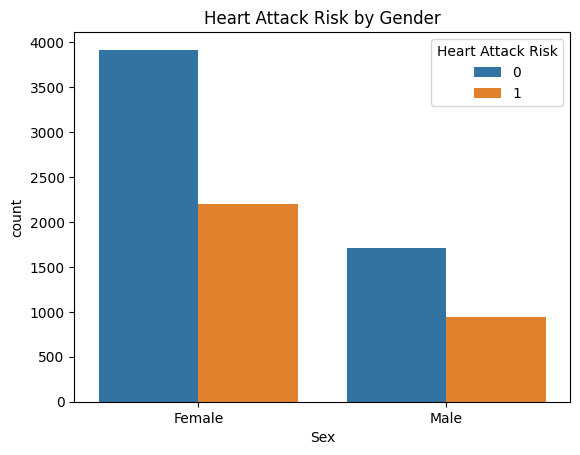

In [5]:
sns.countplot(x='Sex', hue='Heart Attack Risk', data=df)
plt.title('Heart Attack Risk by Gender')
plt.xticks([0, 1], ['Female', 'Male'])

plt.show()

Number of female patients are less, so we must consider ratio

In [6]:
## finding how many female and male patients in the dataset
gender_group_number = df.groupby('Sex')["Patient ID"].count()
gender_group_number

Sex
Female    2652
Male      6111
Name: Patient ID, dtype: int64

In [7]:
# find number of male and female with heart attack risk separately
gender_group_ha_risk = df.groupby('Sex')['Heart Attack Risk'].sum()
gender_group_ha_risk

Sex
Female     944
Male      2195
Name: Heart Attack Risk, dtype: int64

In [8]:
# find the ratio of postive heart attack risk to all by gender
gender_group_number / gender_group_ha_risk

Sex
Female    2.809322
Male      2.784055
dtype: float64

It shows that heart attack risk is more visible in female of this dataset

#### plots binary features against heart attack risk


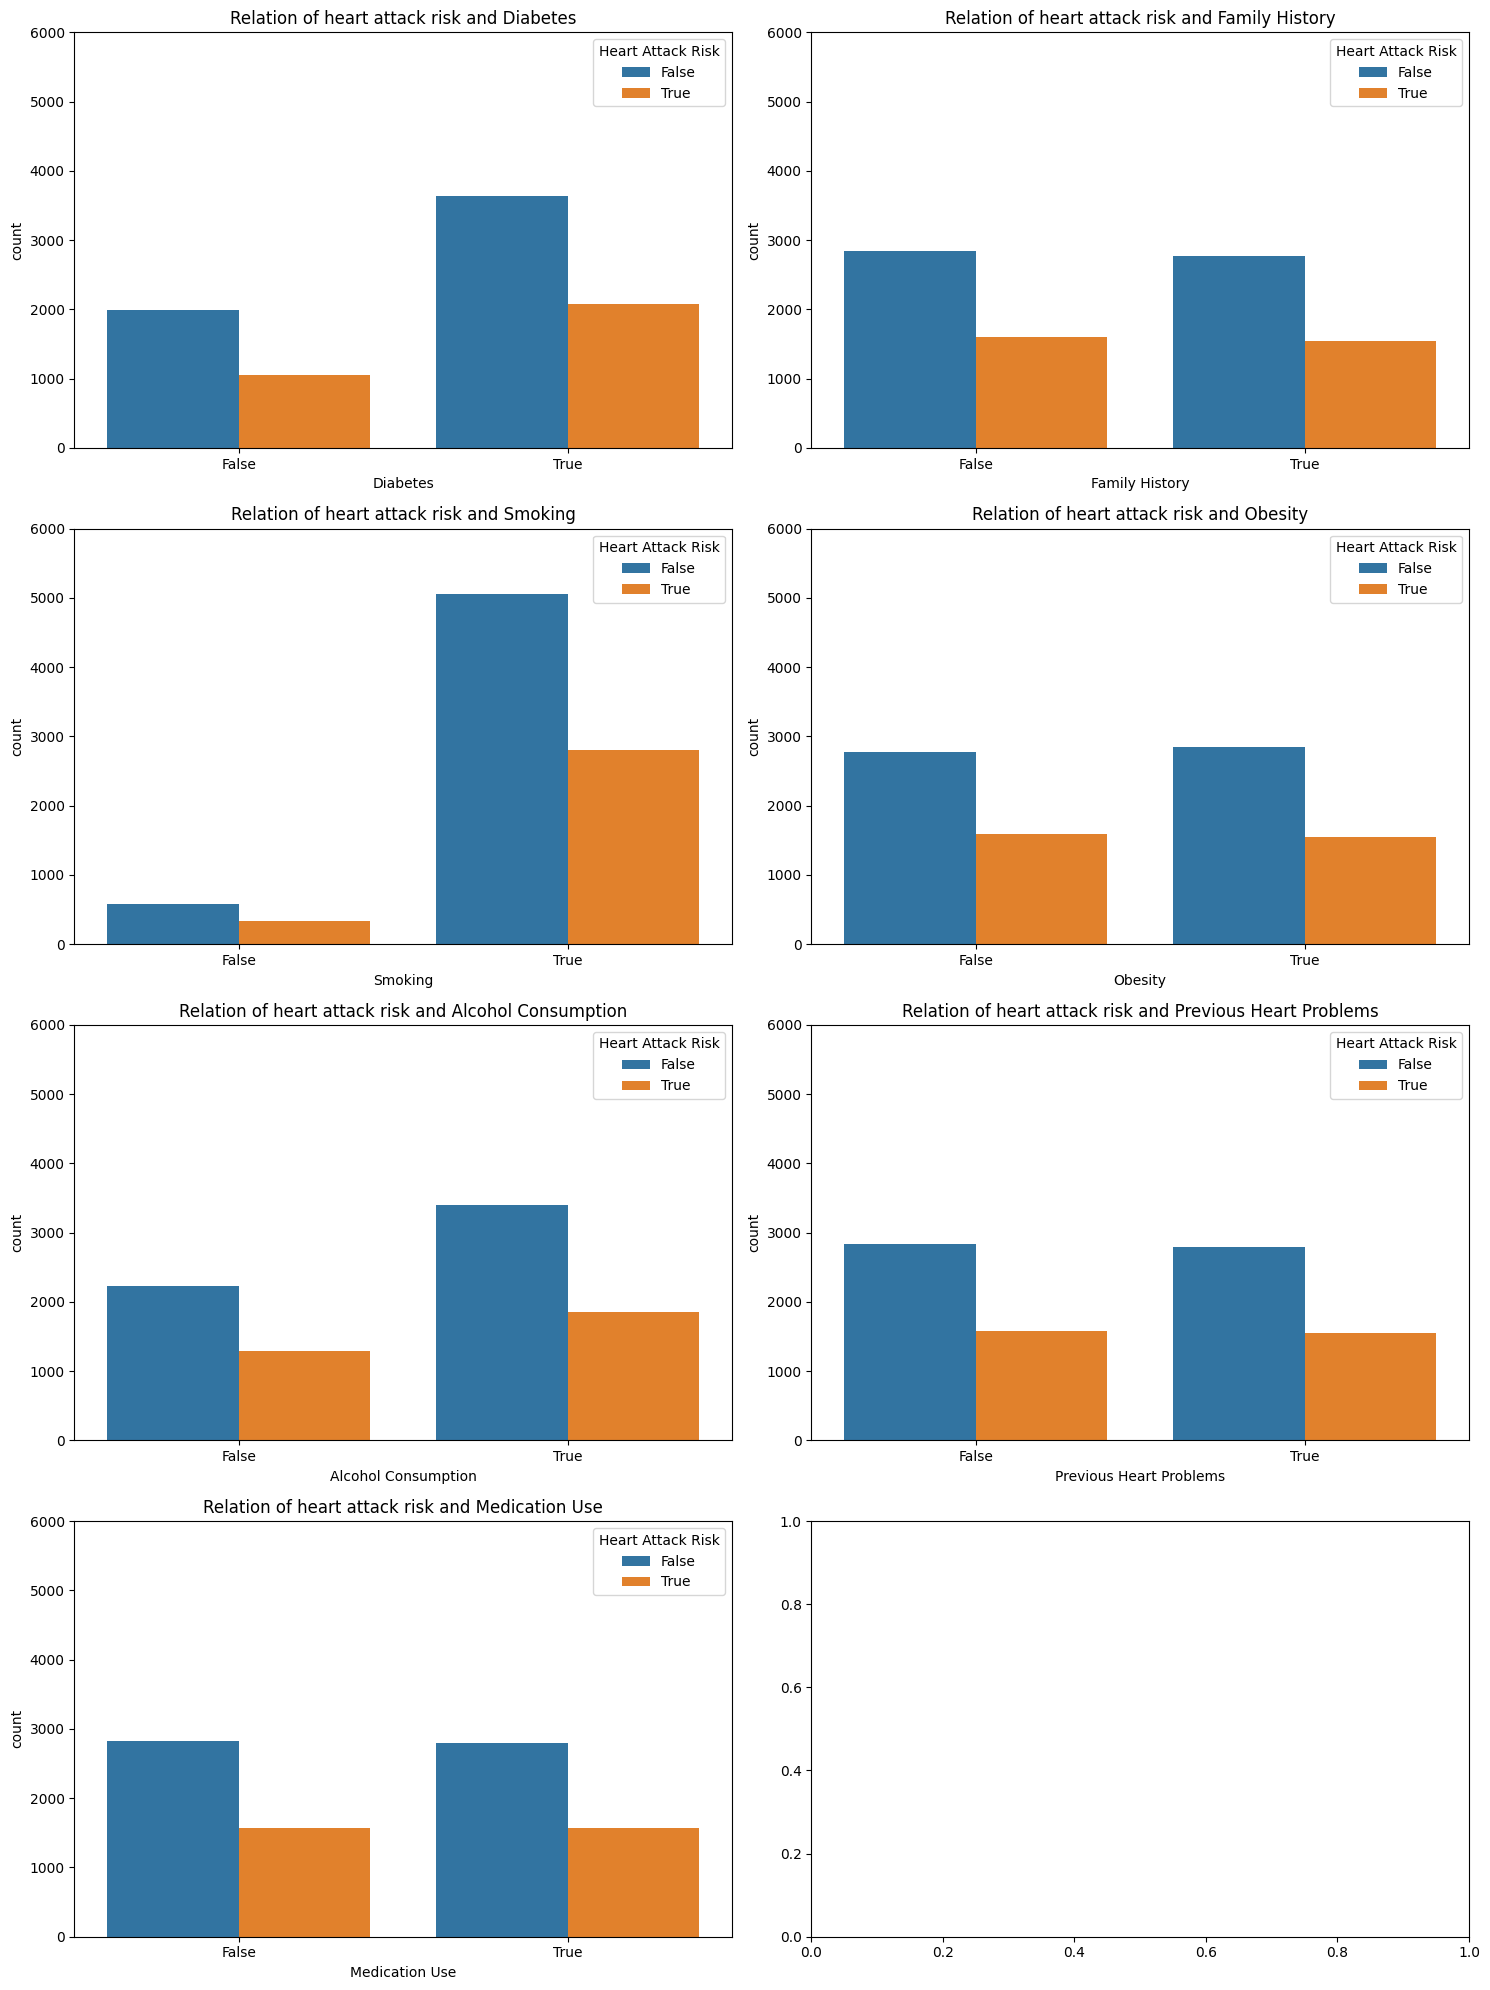

In [91]:
binary_columns = df.select_dtypes(include=['bool']).columns

n_columns = 2
n_features = len(binary_columns) 
n_rows = int(np.ceil(n_features / n_columns)) 

fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5*n_rows))
for i, feature in enumerate(binary_columns):
    if feature != 'Heart Attack Risk':
        row_index = i // n_columns  
        col_index = i % n_columns  
        ax = axes[row_index, col_index] if n_rows > 1 else axes[col_index]  # Handle single row case
        sns.countplot(x=feature, hue='Heart Attack Risk', data=df, ax=ax)
        ax.set_ylim(0, 6000)  # Set y-axis limit
        ax.set_title(f'Relation of heart attack risk and {feature}')
plt.tight_layout()
plt.show()

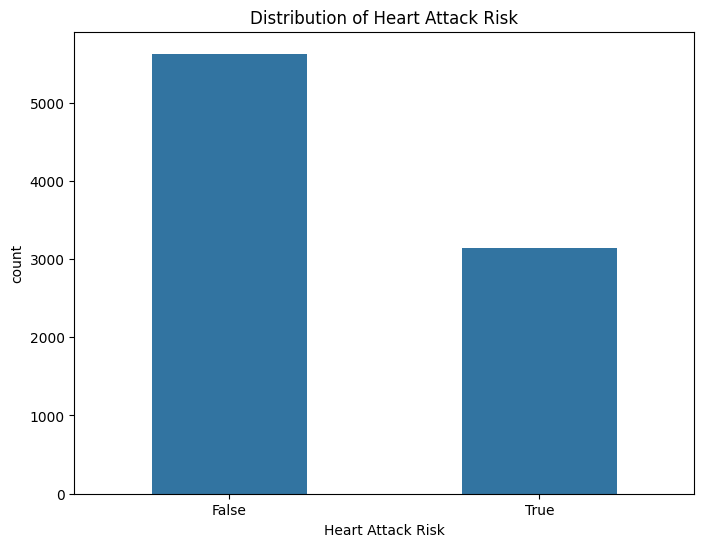

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Attack Risk', data=df, width = 0.5)
plt.title('Distribution of Heart Attack Risk')
plt.show()

## Missing Values 

**Find missing values per each feature**:

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


**No missing value exists  in this dataset**

In [15]:
## check type of data of columns
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                              bool
Family History                        bool
Smoking                               bool
Obesity                               bool
Alcohol Consumption                   bool
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems               bool
Medication Use                        bool
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

The blood pressure consists of 2 parts, 'Systolic' and 'Diastolic'.

The dataset recorded them together and it is known as a 'object' variable.

To make it numeric we splitted in 2 features:


In [16]:
df['Systolic_BP'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic_BP'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))

# Drop the'Blood Pressure' column
df.drop('Blood Pressure', axis=1, inplace=True)

As it showed above even boolean features are saved as int64, to easily seperate them we find binary features and change their type to bool

In [17]:
# distinguish binary features
binary_features = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'int64']
# change type to boolean
df[binary_features] = df[binary_features].astype(bool)

In [18]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Heart Rate                           int64
Diabetes                              bool
Family History                        bool
Smoking                               bool
Obesity                               bool
Alcohol Consumption                   bool
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems               bool
Medication Use                        bool
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [19]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
numeric_columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

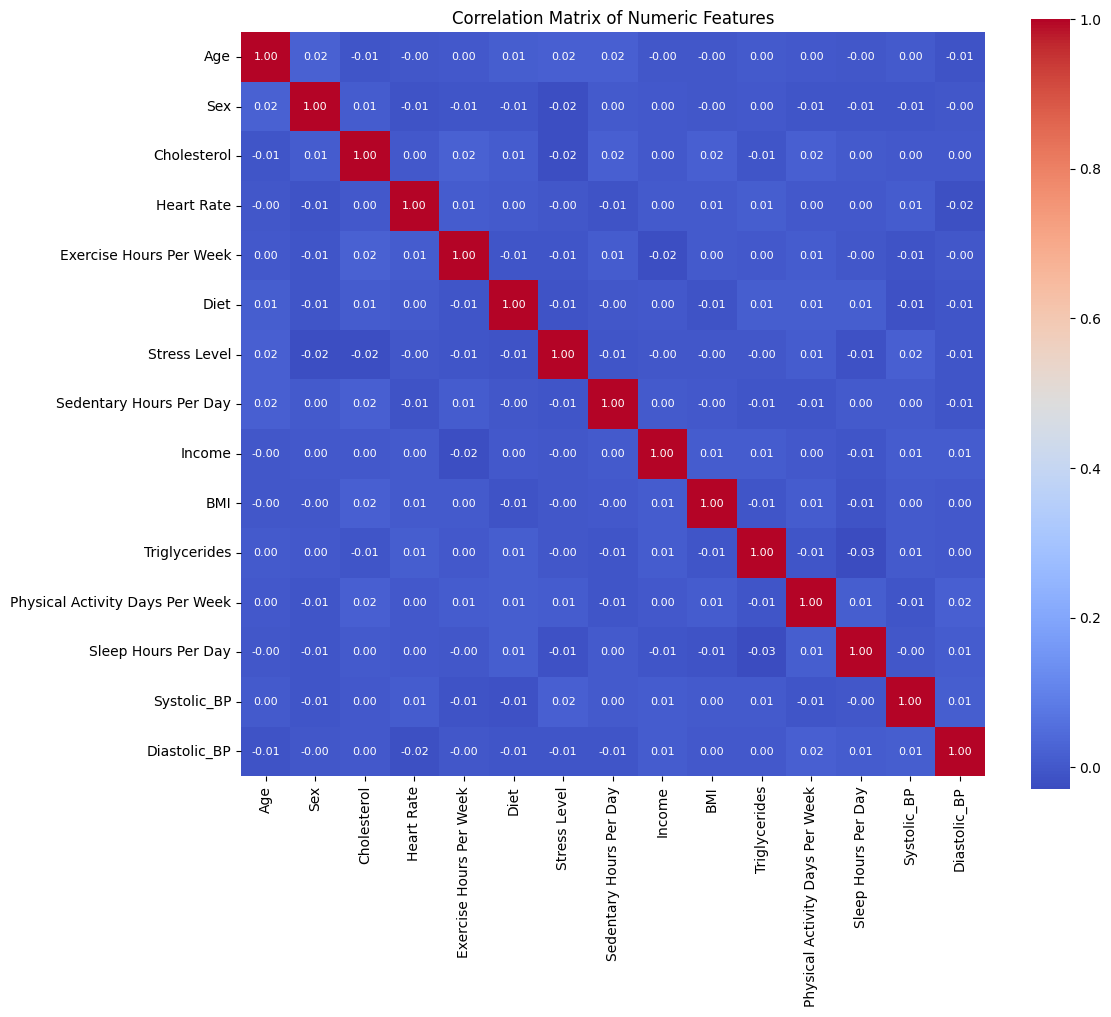

In [56]:
# calculate the correlations
correlation_matrix = df[numeric_columns].corr()
correlation_target = correlation_matrix#['Heart Attack Risk'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt='.2f', square = True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [55]:
# Separate binary and numeric features
binary_features = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Previous Heart Problems', 'Medication Use']
numeric_features = ['Age', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'Income', 'BMI', 'Triglycerides', 'Stress Level']

# Calculate point-biserial correlation coefficient for binary features
point_biserial_correlations = {}
binary_target_variable = df['Heart Attack Risk']
for column in binary_features:
    biserial_corr, _ = scipy.stats.pointbiserialr(df[column], binary_target_variable)
    point_biserial_correlations[column] = biserial_corr

# Calculate phi coefficient for binary-binary relationships
phi_coefficients = {}
binary_pairs = [('Diabetes', 'Family History'), ('Smoking', 'Obesity'), ('Previous Heart Problems', 'Medication Use')]
for pair in binary_pairs:
    contingency_table = pd.crosstab(df[pair[0]], df[pair[1]])
    phi_coefficient = np.sqrt(contingency_table.div(contingency_table.sum(axis=1), axis=0).div(contingency_table.sum(axis=0), axis=1).values).ravel()[1]
    phi_coefficients['-'.join(pair)] = phi_coefficient

# Calculate correlation coefficients for numeric features
numeric_correlations = df[numeric_features].apply(lambda x: x.corr(binary_target_variable, method='pearson'))

# Print the calculated correlation coefficients
print("Point-biserial Correlation Coefficients for Binary Features:")
print(point_biserial_correlations)
print("\nPhi Coefficients for Binary-Binary Relationships:")
print(phi_coefficients)
print("\nCorrelation Coefficients for Numeric Features:")
print(numeric_correlations)

Point-biserial Correlation Coefficients for Binary Features:
{'Diabetes': 0.017225295711578936, 'Family History': -0.0016519219073441473, 'Smoking': -0.0040512792344295995, 'Obesity': -0.01331755262922422, 'Previous Heart Problems': 0.00027356445110144213, 'Medication Use': 0.002234406530651131}

Phi Coefficients for Binary-Binary Relationships:
{'Diabetes-Family History': 0.010784735413308323, 'Smoking-Obesity': 0.010620006082155083, 'Previous Heart Problems-Medication Use': 0.010654120531086208}

Correlation Coefficients for Numeric Features:
Age              0.006403
Cholesterol      0.019340
Systolic_BP      0.018585
Diastolic_BP    -0.007509
Heart Rate      -0.004251
Income           0.009628
BMI              0.000020
Triglycerides    0.010471
Stress Level    -0.004111
dtype: float64


## Normalization

#### In order to find which features need normalizations, different factors must be checked
1 - The model where going to use (models base on distance is sensitive to the scale of data)

2 - Data Distribution

We are not aware of model at this time so we just check Distribution

In [24]:
numeric_columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

**Plots**

In [25]:
def histogram_plot(data, columns):
    for column in columns:
        plt.figure()
        sns.histplot(data[column], kde=False, bins=20)  # Histogram without kernel density estimate
        plt.title('Histogram of ' + column)
    plt.show()

In [26]:
def box_plot(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 4 * len(columns)))
    fig.subplots_adjust(hspace=0.5)
    
    # Plot boxplots for each numeric feature
    for i, column in enumerate(columns):
        sns.boxplot(ax=axes[i], x=df[column], color='skyblue', showfliers=True)
        axes[i].set_title(f'Boxplot of {column}')
    plt.show()

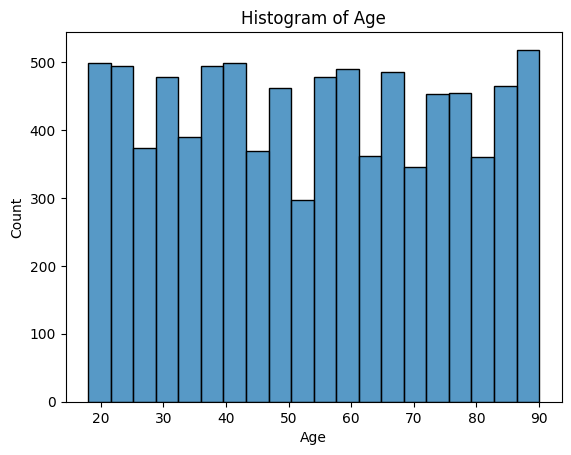

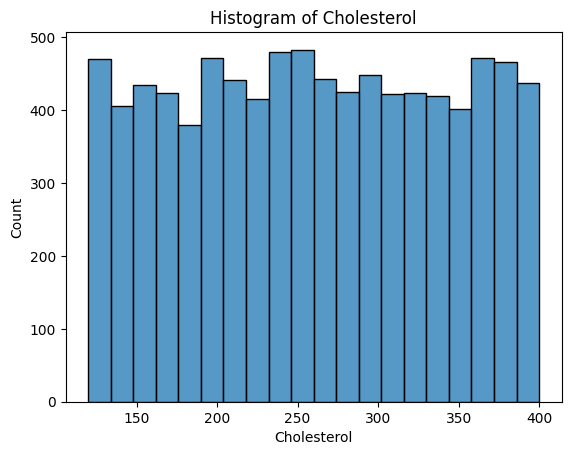

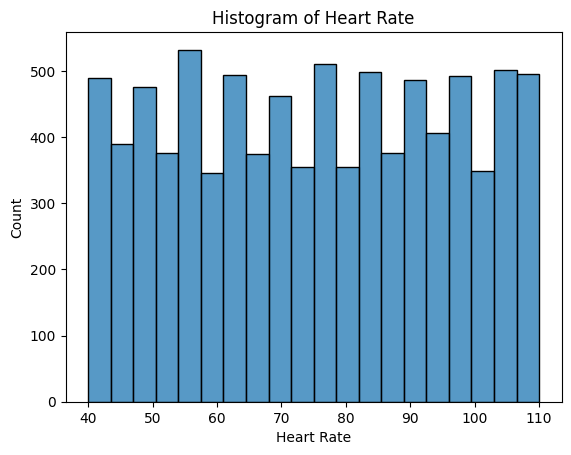

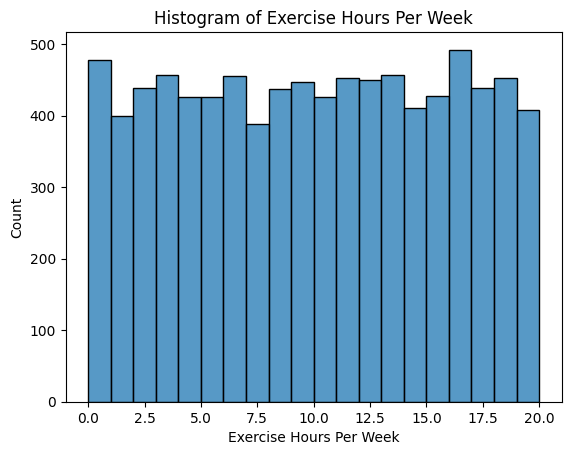

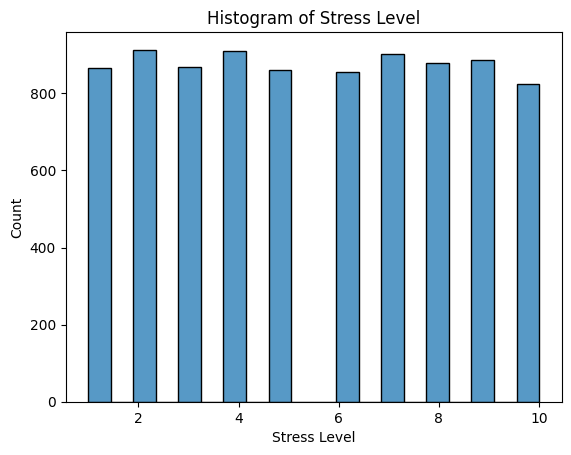

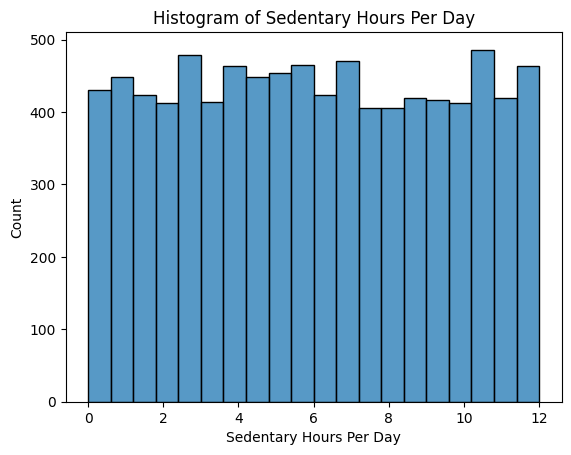

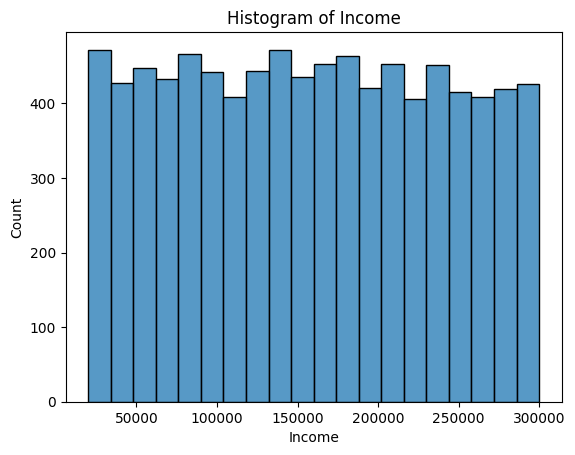

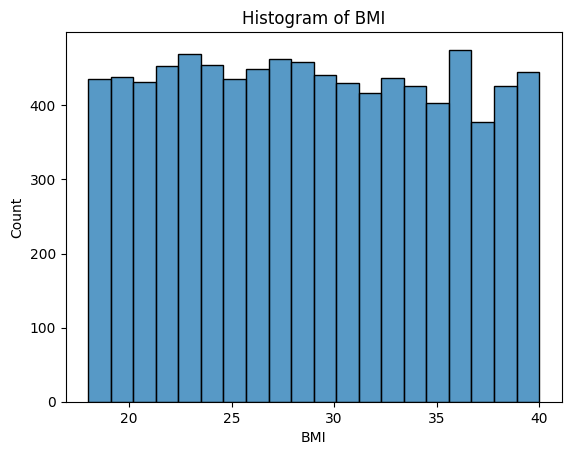

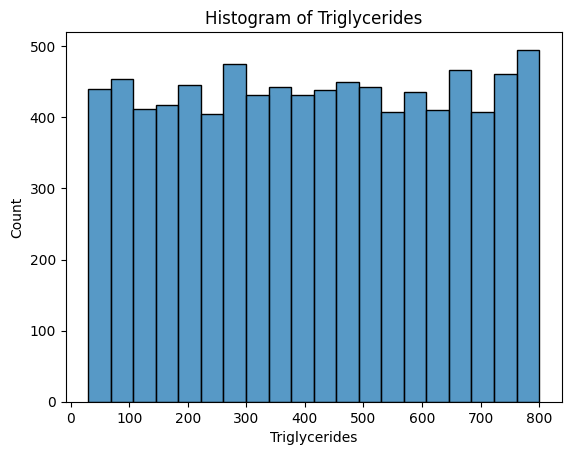

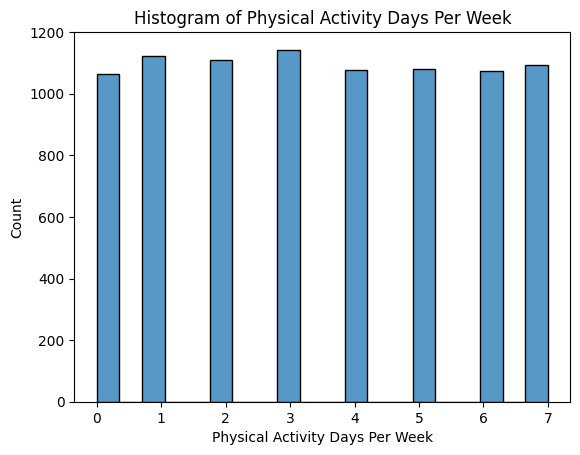

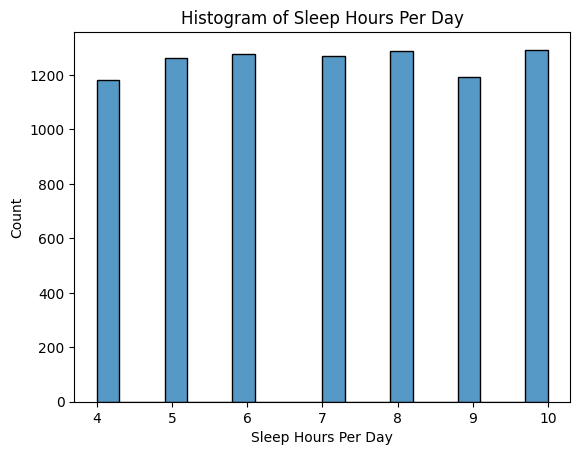

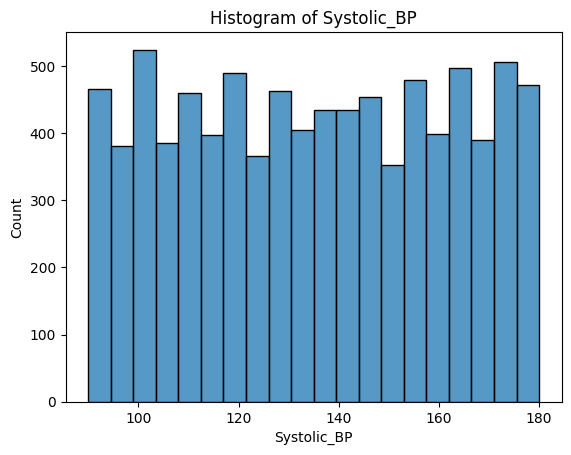

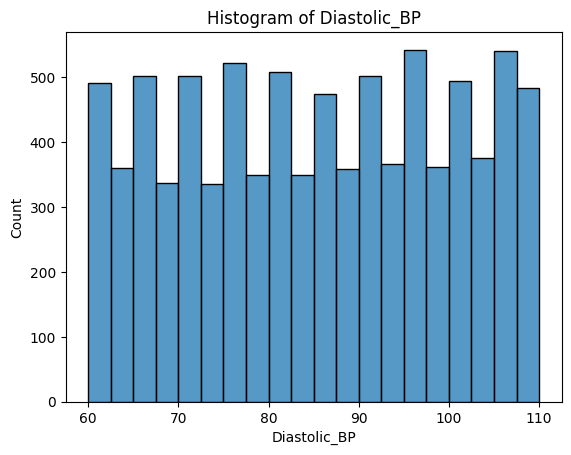

In [27]:
histogram_plot(df, numeric_columns)

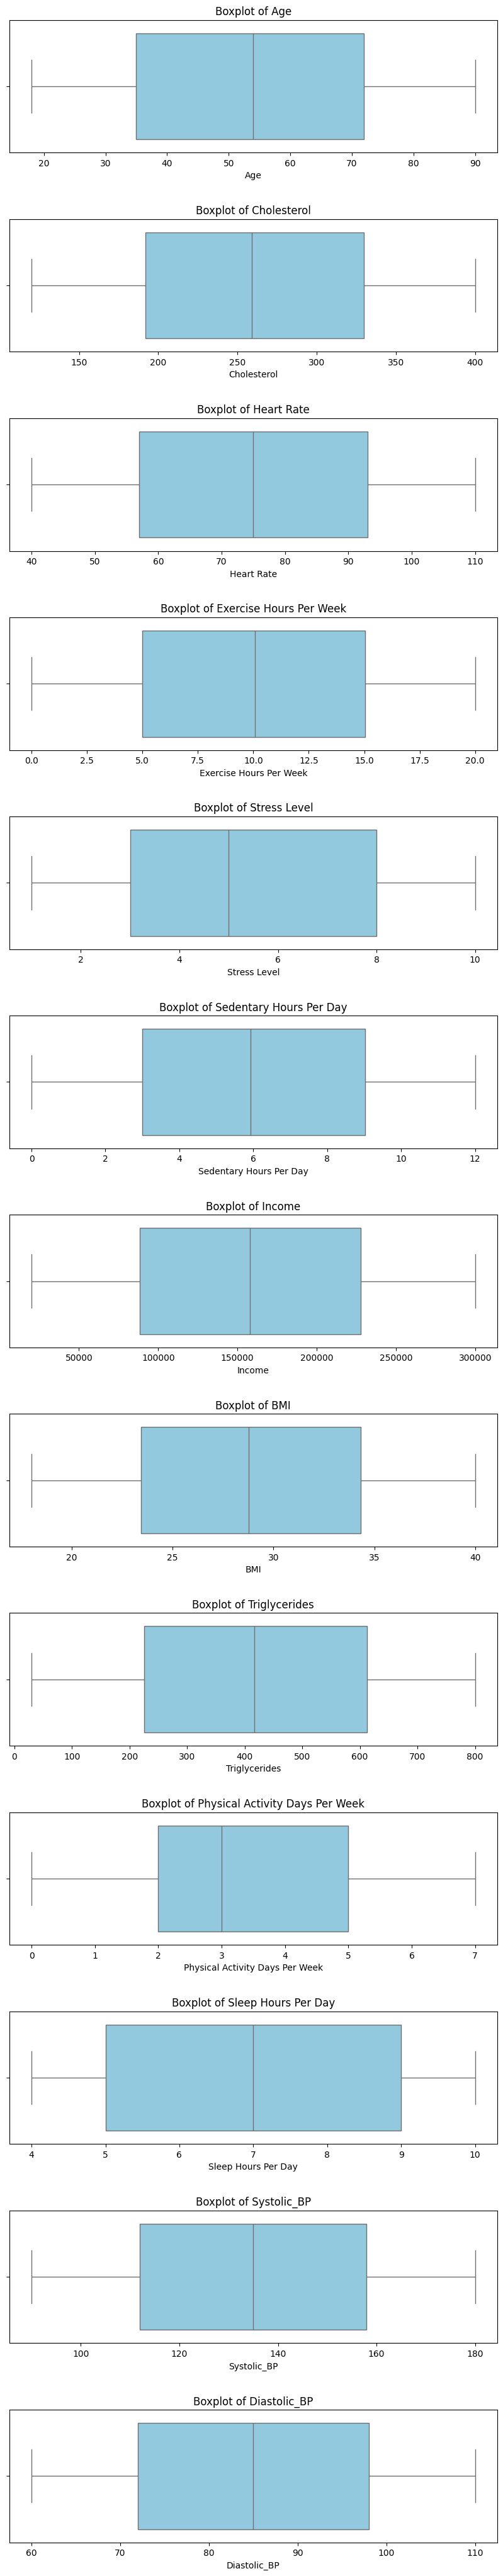

In [28]:
box_plot(df, numeric_columns)

**Range of Income is really different from the others, so normalization has benefit for it**

In [29]:
# scale
scaler = MinMaxScaler(feature_range=(0,10))
df['Income'] = scaler.fit_transform(df[['Income']])

In [30]:
df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,BMW7812,67,Male,208,72,False,False,True,False,False,4.168189,Average,False,False,9,6.615001,8.622683,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,False,158,88
1,CZE1114,21,Male,389,98,True,True,True,True,True,1.813242,Unhealthy,True,False,1,4.963459,9.493162,27.194973,235,1,7,Canada,North America,Northern Hemisphere,False,165,93
2,BNI9906,21,Female,324,72,True,False,False,False,False,2.078353,Healthy,True,True,9,9.463426,7.689394,28.176571,587,4,4,France,Europe,Northern Hemisphere,False,174,99
3,JLN3497,84,Male,383,73,True,True,True,False,True,9.828130,Average,True,False,9,7.648981,3.772098,36.464704,378,3,4,Canada,North America,Northern Hemisphere,False,163,100
4,GFO8847,66,Male,318,93,True,True,True,True,False,5.804299,Unhealthy,True,False,6,1.514821,5.019543,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,False,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,True,True,True,False,True,7.917342,Healthy,True,True,8,10.806373,7.694325,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,False,94,76
8759,QSV6764,28,Female,120,73,True,False,False,True,False,16.558426,Healthy,False,False,8,3.833038,7.067690,23.993866,617,4,9,Canada,North America,Northern Hemisphere,False,157,102
8760,XKA5925,47,Male,250,105,False,True,True,True,True,3.148438,Average,True,False,5,2.375214,0.605091,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,True,161,75
8761,EPE6801,36,Male,178,60,True,False,True,False,False,3.789950,Unhealthy,True,True,5,0.029104,6.784081,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,False,119,67


## Outlier Detection

**By Z_Score**

In [31]:
def outlier_by_z(data, columns):
    z_scores = zscore(data[columns])
    ## z_score above 3 or less than -3 is considered outlier
    abs_z_scores = np.abs(z_scores)
    z_outliers = (abs_z_scores > 3).any(axis=1)
    return z_outliers

In [32]:
z_outliers = outlier_by_z(df, numeric_columns)

**analyze return values**

outlier_detection by z_scores. True shows number of outliers
 False    8763
Name: count, dtype: int64




([<matplotlib.axis.XTick at 0x15a33fa0cd0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

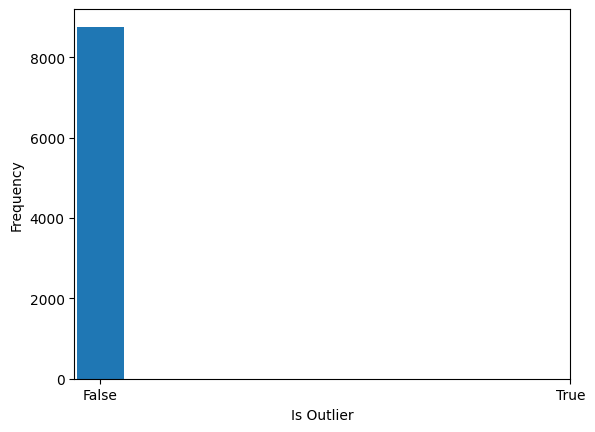

In [33]:
z_score_outlier_value_counts = z_outliers.value_counts()
print(f"outlier_detection by z_scores. True shows number of outliers\n {z_score_outlier_value_counts}\n\n")
plt.bar(z_score_outlier_value_counts.index, z_score_outlier_value_counts.values, width=0.1)
plt.xlabel('Is Outlier')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'])


No outliers detect by this method, let`s try another method:

In [34]:
def outlier_box_plot(data, columns):
   outliers = pd.DataFrame(index=data.index, columns=columns)
   num_outliers = 0
   for column in columns:
       Q1 = data[column].quantile(0.25)
       Q3 = data[column].quantile(0.75)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR
       is_outlier = (data[column] < lower_bound) | (data[column] > upper_bound)
       num_outliers += is_outlier.sum()
       outliers[column] = is_outlier
   return num_outliers, outliers

In [35]:
num_of_outliers, box_plot_outliers = outlier_box_plot(df, numeric_columns)

**analyze return values**


In [36]:
print(f"number_of_outliers defined by IQR is {num_of_outliers}")

number_of_outliers defined by IQR is 0


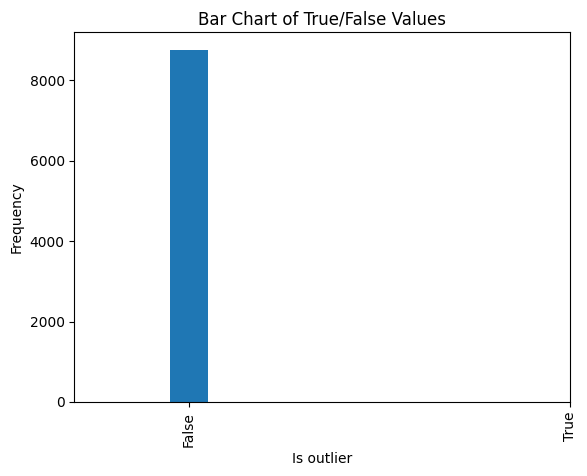

In [37]:
value_counts = box_plot_outliers[numeric_columns].value_counts()

# Plot a bar chart of the frequency of 'True' and 'False' values
value_counts.plot(kind='bar', width = 0.1)
plt.xlabel('Is outlier')
plt.ylabel('Frequency')
plt.title('Bar Chart of True/False Values')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

**No outliers finds even with this method**

## Inconsistancy 

In [38]:
obesed_patients = df[df["Obesity"] == True]

In [39]:
obesed_patients[obesed_patients["BMI"] < 30]
## there must be above 30

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP
1,CZE1114,21,Male,389,98,True,True,True,True,True,1.813242,Unhealthy,True,False,1,4.963459,9.493162,27.194973,235,1,7,Canada,North America,Northern Hemisphere,False,165,93
4,GFO8847,66,Male,318,93,True,True,True,True,False,5.804299,Unhealthy,True,False,6,1.514821,5.019543,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,False,91,88
7,XXM0972,84,Male,220,107,False,False,True,True,True,3.427929,Average,False,True,4,10.543780,3.645370,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,True,131,68
9,FTJ5456,43,Female,248,55,False,True,True,True,True,0.194515,Unhealthy,False,False,4,4.055115,6.775506,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,False,160,70
16,DXB2434,69,Male,379,40,True,True,True,True,True,4.184648,Average,True,False,5,9.060509,8.858238,28.332747,68,3,6,Brazil,South America,Southern Hemisphere,False,173,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,FPL5366,64,Female,338,79,True,True,True,True,True,13.595200,Average,False,True,6,5.365595,2.457091,25.534554,93,6,4,Brazil,South America,Southern Hemisphere,False,173,105
8750,FDK8693,34,Female,304,93,False,True,False,True,True,6.658321,Average,False,False,10,6.900037,7.281809,22.418494,791,4,5,China,Asia,Northern Hemisphere,False,102,92
8751,SVO4635,75,Male,176,78,False,False,True,True,True,18.382487,Healthy,False,False,3,6.634988,7.429544,23.793280,748,5,8,Spain,Europe,Southern Hemisphere,True,102,89
8753,NVC8704,82,Male,311,87,False,True,True,True,True,8.202449,Unhealthy,True,False,7,8.402977,4.339495,27.694240,515,1,5,Australia,Australia,Southern Hemisphere,True,126,108


### Concept Hierarchy Generation

**Age**

In [40]:
## 0-12 child
## 13-19 teenager
## 20-35 young
## 36-50 middle age
## 51-100 old
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 19, 35, 50, 100], labels=['child', 'teenager', 'young', 'middle-age', 'old'])
df['BMI_Class'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])

In [41]:
df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP,AgeGroup,BMI_Class
0,BMW7812,67,Male,208,72,False,False,True,False,False,4.168189,Average,False,False,9,6.615001,8.622683,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,False,158,88,old,Obese
1,CZE1114,21,Male,389,98,True,True,True,True,True,1.813242,Unhealthy,True,False,1,4.963459,9.493162,27.194973,235,1,7,Canada,North America,Northern Hemisphere,False,165,93,young,Overweight
2,BNI9906,21,Female,324,72,True,False,False,False,False,2.078353,Healthy,True,True,9,9.463426,7.689394,28.176571,587,4,4,France,Europe,Northern Hemisphere,False,174,99,young,Overweight
3,JLN3497,84,Male,383,73,True,True,True,False,True,9.828130,Average,True,False,9,7.648981,3.772098,36.464704,378,3,4,Canada,North America,Northern Hemisphere,False,163,100,old,Obese
4,GFO8847,66,Male,318,93,True,True,True,True,False,5.804299,Unhealthy,True,False,6,1.514821,5.019543,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,False,91,88,old,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,True,True,True,False,True,7.917342,Healthy,True,True,8,10.806373,7.694325,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,False,94,76,old,Normal weight
8759,QSV6764,28,Female,120,73,True,False,False,True,False,16.558426,Healthy,False,False,8,3.833038,7.067690,23.993866,617,4,9,Canada,North America,Northern Hemisphere,False,157,102,young,Normal weight
8760,XKA5925,47,Male,250,105,False,True,True,True,True,3.148438,Average,True,False,5,2.375214,0.605091,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,True,161,75,middle-age,Obese
8761,EPE6801,36,Male,178,60,True,False,True,False,False,3.789950,Unhealthy,True,True,5,0.029104,6.784081,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,False,119,67,middle-age,Overweight


In [42]:
gender_map = {'Male': 1, 'Female': 0}
diet_map = {"Healthy": 0, "Average":1, "Unhealthy":2}
age_map = {'child': 0, 'teenager': 1, 'young': 2, 'middle-age': 3 , 'old': 4}
bmi_map = {'Underweight': 0, 'Normal weight':1, 'Overweight':2, 'Obese':3}
encoded_df = df
# Use the map function to encode BMI categories
encoded_df['BMI_Class'] = encoded_df['BMI_Class'].map(bmi_map)
encoded_df['AgeGroup'] = encoded_df['AgeGroup'].map(age_map)
encoded_df['Diet'] = encoded_df['Diet'].map(diet_map)
encoded_df['Sex'] = encoded_df['Sex'].map(gender_map)
encoded_df = encoded_df.replace({True: 1, False: 0})

In [43]:
encoded_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP,AgeGroup,BMI_Class
0,BMW7812,67,1,208,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,8.622683,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88,4,3
1,CZE1114,21,1,389,98,1,1,1,1,1,1.813242,2,1,0,1,4.963459,9.493162,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93,2,2
2,BNI9906,21,0,324,72,1,0,0,0,0,2.078353,0,1,1,9,9.463426,7.689394,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99,2,2
3,JLN3497,84,1,383,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,3.772098,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100,4,3
4,GFO8847,66,1,318,93,1,1,1,1,0,5.804299,2,1,0,6,1.514821,5.019543,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,1,121,61,1,1,1,0,1,7.917342,0,1,1,8,10.806373,7.694325,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76,4,1
8759,QSV6764,28,0,120,73,1,0,0,1,0,16.558426,0,0,0,8,3.833038,7.067690,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102,2,1
8760,XKA5925,47,1,250,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,0.605091,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75,3,3
8761,EPE6801,36,1,178,60,1,0,1,0,0,3.789950,2,1,1,5,0.029104,6.784081,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67,3,2


## Generate new features

In [44]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
encoded_df.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.697364,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.992126,0.495835,0.498345,5.469702,5.993690,4.937661,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.817134,0.500011,0.500026,2.859622,3.466359,2.878796,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,0.000000,1.000000,0.001263,0.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,0.000000,3.000000,2.998794,2.438369,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,1.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,1.000000,0.000000,0.000000,5.000000,5.933622,4.923470,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,2.000000,1.000000,1.000000,8.000000,9.019124,7.420255,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,1.000000,1.000000,10.000000,11.999313,10.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


In [45]:
correlations_df = pd.DataFrame(encoded_df.corr(numeric_only=True)['Heart Attack Risk'])
correlations_df

,Heart Attack Risk
Age,0.006403
Sex,0.003095
Cholesterol,0.019340
Heart Rate,-0.004251
Diabetes,0.017225
Family History,-0.001652
Smoking,-0.004051
Obesity,-0.013318
Alcohol Consumption,-0.013778
Exercise Hours Per Week,0.011133


In [46]:
def correlation(dataframe, feature_name, target_name):
    correlation = dataframe[feature_name].corr(dataframe[target_name])
    print(f"Correlation between {feature_name} and {target_name}: {correlation}")
    # scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(dataframe[feature_name], dataframe[target_name], alpha=0.5)
    plt.title(f"Scatter Plot of {feature_name} vs {target_name}")
    plt.xlabel(feature_name)
    plt.ylabel(target_name)
    plt.grid(True)
    plt.show()

    return correlation

**Life Style Risk**

In [69]:
life_style_score = (encoded_df['Smoking'] + encoded_df['Alcohol Consumption'] + (encoded_df["Diet"]/2) + encoded_df["Stress Level"]/10 - (encoded_df["Exercise Hours Per Week"]/20))/4
life_style_score = life_style_score.apply(lambda x: max(x, 0))
encoded_df['Life Style Risk'] = life_style_score

In [70]:
# pair = ("Life Style Risk", "Heart Attack Risk")
# contingency_table = pd.crosstab(encoded_df[pair[0]],encoded_df[pair[1]])
# phi_coefficient = np.sqrt(contingency_table.div(contingency_table.sum(axis=1), axis=0).div(contingency_table.sum(axis=0), axis=1).values).ravel()[1]

# # Print the phi coefficient
# print(f"Correlation of {pair} by Phi Coefficient: {phi_coefficient}")


Correlation of ('Life Style Risk', 'Heart Attack Risk') by Phi Coefficient: 0.009900626147773178


In [72]:
encoded_df['Life Style Risk'].corr(encoded_df["Heart Attack Risk"], method='pearson')

-0.018569348015317174

In [59]:
# correlation(encoded_df, 'Life Style Risk', "Heart Attack Risk")

In [49]:
encoded_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP,AgeGroup,BMI_Class,Life Style Risk
0,BMW7812,67,1,208,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,8.622683,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88,4,3,2.191591
1,CZE1114,21,1,389,98,1,1,1,1,1,1.813242,2,1,0,1,4.963459,9.493162,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93,2,2,3.009338
2,BNI9906,21,0,324,72,1,0,0,0,0,2.078353,0,1,1,9,9.463426,7.689394,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99,2,2,0.796082
3,JLN3497,84,1,383,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,3.772098,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100,4,3,2.908594
4,GFO8847,66,1,318,93,1,1,1,1,0,5.804299,2,1,0,6,1.514821,5.019543,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,4,1,2.309785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,1,121,61,1,1,1,0,1,7.917342,0,1,1,8,10.806373,7.694325,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76,4,1,2.404133
8759,QSV6764,28,0,120,73,1,0,0,1,0,16.558426,0,0,0,8,3.833038,7.067690,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102,2,1,0.000000
8760,XKA5925,47,1,250,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,0.605091,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75,3,3,2.842578
8761,EPE6801,36,1,178,60,1,0,1,0,0,3.789950,2,1,1,5,0.029104,6.784081,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67,3,2,2.310503


## Data Reduction

Continent and Hemisphere are derivable of Country, So we do not need them straightly

In [50]:
encoded_df.drop(['Continent', 'Hemisphere'], axis=1, inplace = True)

Age has been modified by ['child', 'teenager', 'young', 'middle-age', 'old'], so we can omit the column

In [51]:
encoded_df.drop(['Age'], axis=1, inplace = True)

Make Blood Pressure characterestic to one

In [95]:
encoded_df['Mean Arterial Pressure'] = (1/3) * encoded_df['Systolic_BP'] + (2/3) * encoded_df['Diastolic_BP']

In [98]:
encoded_df.drop(['Systolic_BP', 'Diastolic_BP'], axis=1, inplace = True)

In [99]:
encoded_df

,Patient ID,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,AgeGroup,BMI_Class,Life Style Risk,Mean Arterial Pressure
0,BMW7812,1,208,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,8.622683,31.251233,286,0,6,Argentina,0,4,3,0.547898,111.333333
1,CZE1114,1,389,98,1,1,1,1,1,1.813242,2,1,0,1,4.963459,9.493162,27.194973,235,1,7,Canada,0,2,2,0.752334,117.000000
2,BNI9906,0,324,72,1,0,0,0,0,2.078353,0,1,1,9,9.463426,7.689394,28.176571,587,4,4,France,0,2,2,0.199021,124.000000
3,JLN3497,1,383,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,3.772098,36.464704,378,3,4,Canada,0,4,3,0.727148,121.000000
4,GFO8847,1,318,93,1,1,1,1,0,5.804299,2,1,0,6,1.514821,5.019543,21.809144,231,1,5,Thailand,0,4,1,0.577446,89.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,1,121,61,1,1,1,0,1,7.917342,0,1,1,8,10.806373,7.694325,19.655895,67,7,7,Thailand,0,4,1,0.601033,82.000000
8759,QSV6764,0,120,73,1,0,0,1,0,16.558426,0,0,0,8,3.833038,7.067690,23.993866,617,4,9,Canada,0,2,1,0.000000,120.333333
8760,XKA5925,1,250,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,0.605091,35.406146,527,4,4,Brazil,1,3,3,0.710645,103.666667
8761,EPE6801,1,178,60,1,0,1,0,0,3.789950,2,1,1,5,0.029104,6.784081,27.294020,114,2,8,Brazil,0,3,2,0.577626,84.333333
